# INF391 - Tarea 5

Utilizar Mean-shift para segmentar 3 imágenes a elección. Analizar cómo influye la variedad de colores y formas en la segmentación.

In [0]:
import numpy as np    
import cv2    
from sklearn.cluster import MeanShift, estimate_bandwidth

In [0]:
#Loading original image
originImg_1 = cv2.imread('bob.jpg')
originImg_2 = cv2.imread('chaplin.jpg')
originImg_3 = cv2.imread('yoshi.jpg')


# Shape of original image    
originShape_1 = originImg_1.shape
originShape_2 = originImg_2.shape
originShape_3 = originImg_3.shape


# Converting image into array of dimension [nb of pixels in originImage, 3]
# based on r g b intensities    
flatImg_1 = np.reshape(originImg_1, [-1, 3])
flatImg_2 = np.reshape(originImg_2, [-1, 3])
flatImg_3 = np.reshape(originImg_3, [-1, 3])


In [13]:
# Estimate bandwidth for meanshift algorithm    
# b = estimate_bandwidth(flatImg, quantile=0.1, n_samples=100)

ms_1 = MeanShift(bandwidth = 30, bin_seeding=True)
ms_2 = MeanShift(bandwidth = 30, bin_seeding=True)
ms_3 = MeanShift(bandwidth = 30, bin_seeding=True)

# Performing meanshift on flatImg    
ms_1.fit(flatImg_1)
ms_2.fit(flatImg_2)
ms_3.fit(flatImg_3)


MeanShift(bandwidth=30, bin_seeding=True, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [14]:
# (r,g,b) vectors corresponding to the different clusters after meanshift    
labels_1 = ms_1.labels_
labels_2 = ms_2.labels_
labels_3 = ms_3.labels_

# Remaining colors after meanshift    
cluster_centers_1 = ms_1.cluster_centers_    
cluster_centers_2 = ms_2.cluster_centers_
cluster_centers_3 = ms_3.cluster_centers_


# Finding and diplaying the number of clusters    
labels_unique_1 = np.unique(labels_1)    
n_clusters_1 = len(labels_unique_1)  

print("Number of estimated clusters for Image 1 is: %d" % n_clusters_1)    

labels_unique_2 = np.unique(labels_2)    
n_clusters_2 = len(labels_unique_2)  

print("Number of estimated clusters for Image 2 is: %d" % n_clusters_2)  

labels_unique_3 = np.unique(labels_3)    
n_clusters_3 = len(labels_unique_3)  

print("Number of estimated clusters for Image 3 is: %d" % n_clusters_3)    

Number of estimated clusters for Image 1 is: 14
Number of estimated clusters for Image 2 is: 3
Number of estimated clusters for Image 3 is: 15


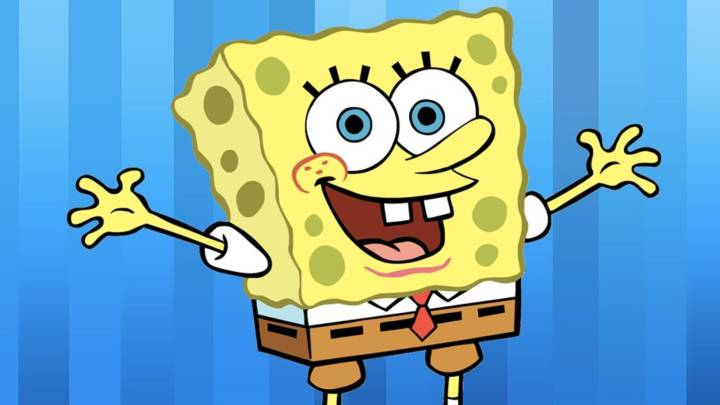

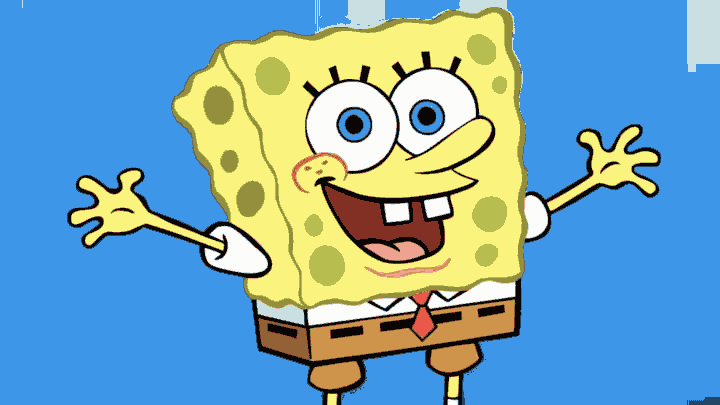

In [15]:
# Displaying segmented image    
segmentedImg = cluster_centers_1[np.reshape(labels_1, originShape_1[:2])]
from google.colab.patches import cv2_imshow
cv2_imshow(originImg_1) 
cv2_imshow(segmentedImg)   



Es posible notar en esta imagen que la variedad de colores, si bien, podría considerar una dificultad para la segmentación, no es tan así, mas cuando cada color se encuentra bien definido en la imagen, en este caso, donde hubo mas problemas para segmentar la imagen es en el fondo, debido a que existe una especie de difuminación de los colores y estos no se encuentran tan bien definidos como en la imagen central.


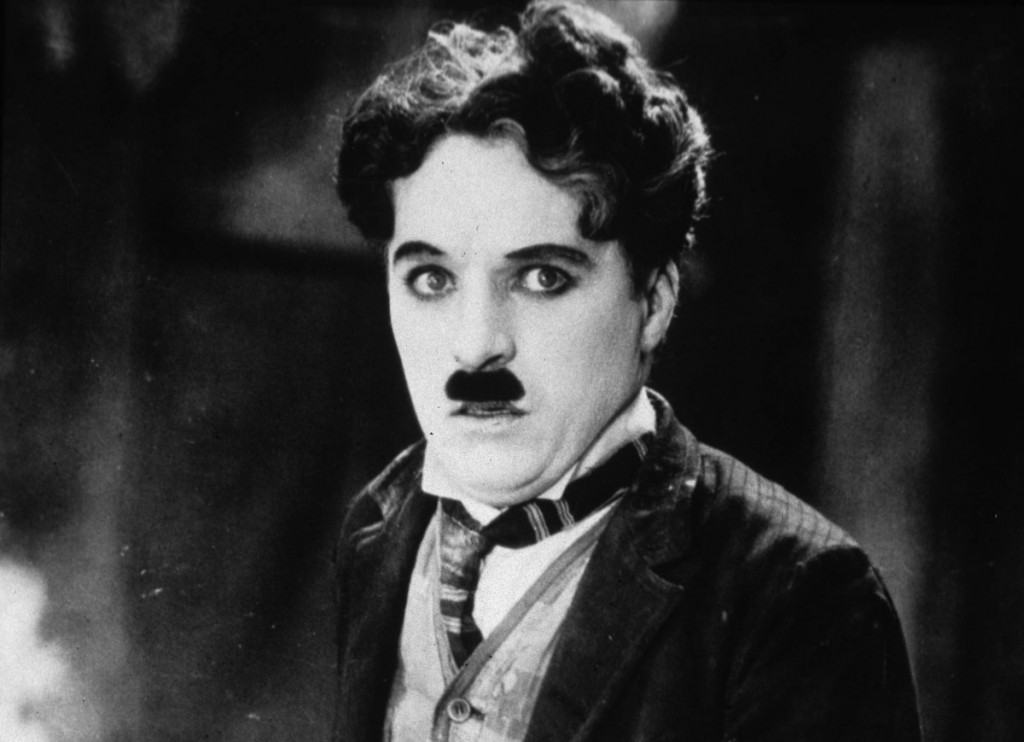

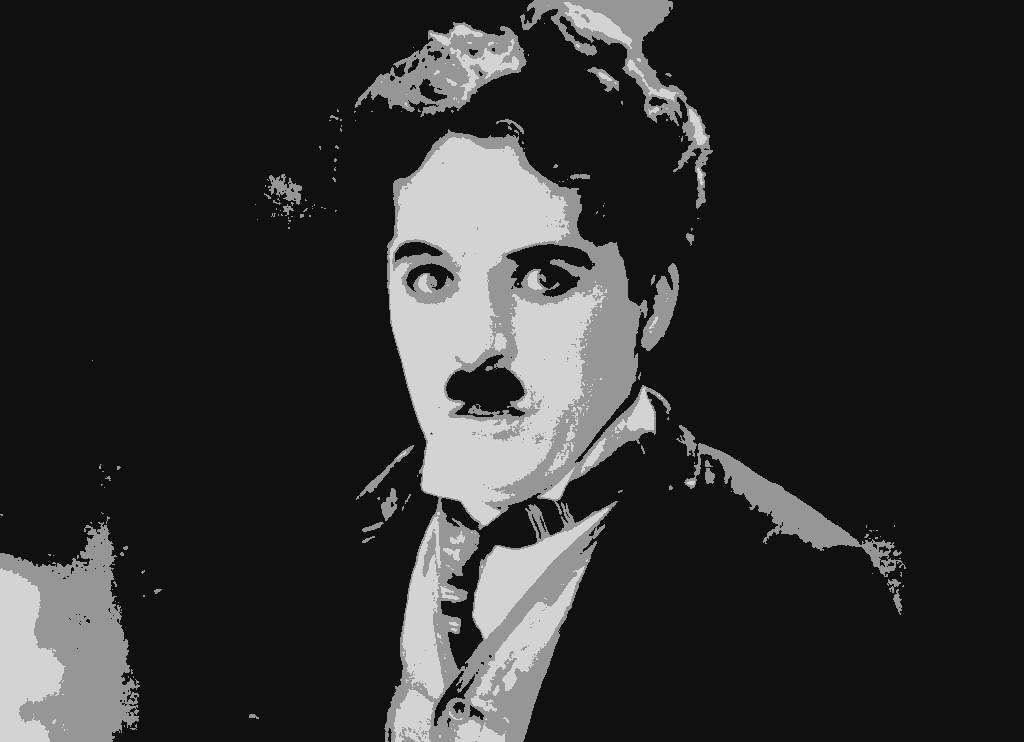

In [11]:
segmentedImg = cluster_centers_2[np.reshape(labels_2, originShape_2[:2])]

cv2_imshow(originImg_2) 
cv2_imshow(segmentedImg)   

En esta imagen es posible notar que se encontraron 3 tipos de cluster, los que al corresponder una imagen en blanco y negro, corresponden a los colores, blanco, negro y gris, al igual que la imagen anterior, partes donde el fondo es mas difuso la segmentaciópn es menos precisa, sin embargo, en las areas como en la esquina inferior, donde es posible notar que existe un color que prevalece, aunque se encuentre difuminado con otros.

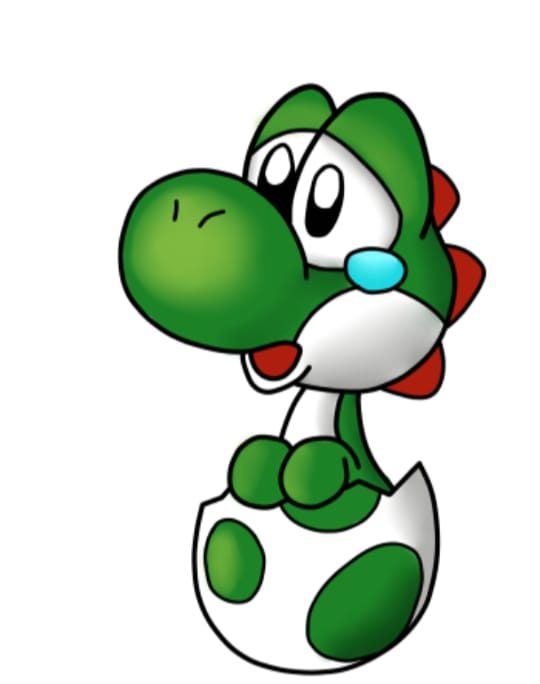

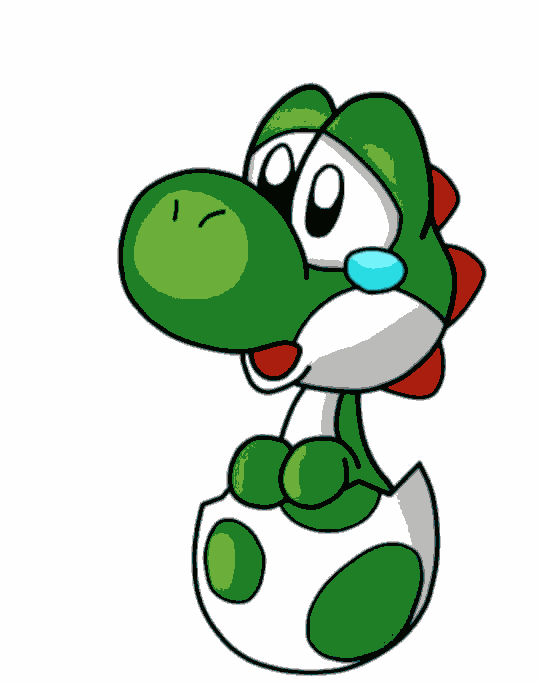

In [0]:
segmentedImg = cluster_centers_3[np.reshape(labels_3, originShape_3[:2])]

cv2_imshow(originImg_3)

En esta última, es posible notar que la segmentación es mas clara, cada color queda bien definido e identificado, las partes sombreadas tambien son bien detectadas, al igual que en las imágenes anteriores, partes con brillo leve y difuminadas son detectadas como un cluster mas.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
